In [2]:
import scipy.stats as stats #It has all the probability distributions available along with many statistical functions.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv(r"hdx_hapi_food_price_npl.csv")
df

,location_code,has_hrp,in_gho,provider_admin1_name,provider_admin2_name,admin1_code,admin1_name,admin2_code,admin2_name,admin_level,...,lon,commodity_category,commodity_name,unit,price_flag,price_type,currency_code,price,reference_period_start,reference_period_end
0,#country+code,#meta+has_hrp,#meta+in_gho,#adm1+name+provider,#adm2+name+provider,#adm1+code,#adm1+name,#adm2+code,#adm2+name,#adm+level,...,#geo+lon,#item+type,#item+name,#item+unit,#item+price+flag,#item+price+type,#currency,#value,#date+start,#date+end
1,NPL,False,False,Province No. 1,DHANKUTA,NP01,Koshi,NP0107,Dhankuta,2,...,87.3333333,cereals and tubers,Rice (coarse),KG,actual,Retail,NPR,17.1,2001-04-15,2001-05-14
2,NPL,False,False,Province No. 1,DHANKUTA,NP01,Koshi,NP0107,Dhankuta,2,...,87.3333333,cereals and tubers,Wheat flour,KG,actual,Retail,NPR,19.0,2001-04-15,2001-05-14
3,NPL,False,False,Province No. 1,ILAM,NP01,Koshi,NP0103,Ilam,2,...,87.9375,cereals and tubers,Rice (coarse),KG,actual,Retail,NPR,13.5,2001-04-15,2001-05-14
4,NPL,False,False,Province No. 1,ILAM,NP01,Koshi,NP0103,Ilam,2,...,87.9375,cereals and tubers,Wheat flour,KG,actual,Retail,NPR,16.0,2001-04-15,2001-05-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37448,NPL,False,False,Province No. 7,KAILALI,NP07,Sudur Paschim,NP0771,Kailali,2,...,80.656386,vegetables and fruits,Cabbage,KG,actual,Retail,NPR,80.0,2024-11-15,2024-12-14
37449,NPL,False,False,Province No. 7,KAILALI,NP07,Sudur Paschim,NP0771,Kailali,2,...,80.656386,vegetables and fruits,Carrots,KG,actual,Retail,NPR,80.0,2024-11-15,2024-12-14
37450,NPL,False,False,Province No. 7,KAILALI,NP07,Sudur Paschim,NP0771,Kailali,2,...,80.656386,vegetables and fruits,Oranges,KG,actual,Retail,NPR,150.0,2024-11-15,2024-12-14
37451,NPL,False,False,Province No. 7,KAILALI,NP07,Sudur Paschim,NP0771,Kailali,2,...,80.656386,vegetables and fruits,Pumpkin,KG,actual,Retail,NPR,70.0,2024-11-15,2024-12-14


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37453 entries, 0 to 37452
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   location_code           37453 non-null  object
 1   has_hrp                 37453 non-null  object
 2   in_gho                  37453 non-null  object
 3   provider_admin1_name    37453 non-null  object
 4   provider_admin2_name    37453 non-null  object
 5   admin1_code             37453 non-null  object
 6   admin1_name             37453 non-null  object
 7   admin2_code             37453 non-null  object
 8   admin2_name             37453 non-null  object
 9   admin_level             37453 non-null  object
 10  market_name             37453 non-null  object
 11  lat                     37453 non-null  object
 12  lon                     37453 non-null  object
 13  commodity_category      37453 non-null  object
 14  commodity_name          37453 non-null  object
 15  un

In [5]:
df.shape

(37453, 22)

In [6]:
df.describe()

,location_code,has_hrp,in_gho,provider_admin1_name,provider_admin2_name,admin1_code,admin1_name,admin2_code,admin2_name,admin_level,...,lon,commodity_category,commodity_name,unit,price_flag,price_type,currency_code,price,reference_period_start,reference_period_end
count,37453,37453,37453,37453,37453,37453,37453,37453,37453,37453,...,37453,37453,37453,37453,37453,37453,37453,37453,37453,37453
unique,2,3,3,8,31,8,8,31,31,3,...,68,8,24,5,2,2,2,1069,272,272
top,NPL,False,False,Province No. 6,BANKE,NP06,Karnali,NP0557,Banke,2,...,87.3333333,cereals and tubers,Rice (coarse),KG,actual,Retail,NPR,50.0,2020-12-15,2021-01-14
freq,37452,32767,32767,8278,1788,8278,8278,1788,1788,32767,...,1553,11697,4288,29347,37452,37452,37452,1438,522,522


In [7]:
set(df['location_code'])

{'#country+code', 'NPL'}

In [8]:
df = df.iloc[1:].reset_index(drop=True)
df

,location_code,has_hrp,in_gho,provider_admin1_name,provider_admin2_name,admin1_code,admin1_name,admin2_code,admin2_name,admin_level,...,lon,commodity_category,commodity_name,unit,price_flag,price_type,currency_code,price,reference_period_start,reference_period_end
0,NPL,False,False,Province No. 1,DHANKUTA,NP01,Koshi,NP0107,Dhankuta,2,...,87.3333333,cereals and tubers,Rice (coarse),KG,actual,Retail,NPR,17.1,2001-04-15,2001-05-14
1,NPL,False,False,Province No. 1,DHANKUTA,NP01,Koshi,NP0107,Dhankuta,2,...,87.3333333,cereals and tubers,Wheat flour,KG,actual,Retail,NPR,19.0,2001-04-15,2001-05-14
2,NPL,False,False,Province No. 1,ILAM,NP01,Koshi,NP0103,Ilam,2,...,87.9375,cereals and tubers,Rice (coarse),KG,actual,Retail,NPR,13.5,2001-04-15,2001-05-14
3,NPL,False,False,Province No. 1,ILAM,NP01,Koshi,NP0103,Ilam,2,...,87.9375,cereals and tubers,Wheat flour,KG,actual,Retail,NPR,16.0,2001-04-15,2001-05-14
4,NPL,False,False,Province No. 1,JHAPA,NP01,Koshi,NP0104,Jhapa,2,...,87.85,cereals and tubers,Rice (coarse),KG,actual,Retail,NPR,13.37,2001-04-15,2001-05-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37447,NPL,False,False,Province No. 7,KAILALI,NP07,Sudur Paschim,NP0771,Kailali,2,...,80.656386,vegetables and fruits,Cabbage,KG,actual,Retail,NPR,80.0,2024-11-15,2024-12-14
37448,NPL,False,False,Province No. 7,KAILALI,NP07,Sudur Paschim,NP0771,Kailali,2,...,80.656386,vegetables and fruits,Carrots,KG,actual,Retail,NPR,80.0,2024-11-15,2024-12-14
37449,NPL,False,False,Province No. 7,KAILALI,NP07,Sudur Paschim,NP0771,Kailali,2,...,80.656386,vegetables and fruits,Oranges,KG,actual,Retail,NPR,150.0,2024-11-15,2024-12-14
37450,NPL,False,False,Province No. 7,KAILALI,NP07,Sudur Paschim,NP0771,Kailali,2,...,80.656386,vegetables and fruits,Pumpkin,KG,actual,Retail,NPR,70.0,2024-11-15,2024-12-14


In [9]:
df.isna().sum()

location_code             0
has_hrp                   0
in_gho                    0
provider_admin1_name      0
provider_admin2_name      0
admin1_code               0
admin1_name               0
admin2_code               0
admin2_name               0
admin_level               0
market_name               0
lat                       0
lon                       0
commodity_category        0
commodity_name            0
unit                      0
price_flag                0
price_type                0
currency_code             0
price                     0
reference_period_start    0
reference_period_end      0
dtype: int64

In [10]:
set(df['currency_code'])


{'NPR'}

In [11]:
set(df['location_code'])

{'NPL'}

In [12]:
set(df['in_gho'])

{False, 'False'}

In [13]:
set(df['has_hrp'])

{False, 'False'}

In [14]:
set(df['provider_admin1_name'])

{'Province No. 1',
 'Province No. 2',
 'Province No. 3',
 'Province No. 4',
 'Province No. 5',
 'Province No. 6',
 'Province No. 7'}

In [15]:
set(df['provider_admin2_name'])

{'ACHHAM',
 'BAGLUNG',
 'BAJHANG',
 'BAJURA',
 'BANKE',
 'CHITAWAN',
 'DHANKUTA',
 'DHANUSHA',
 'DOLPA',
 'DOTI',
 'HUMLA',
 'ILAM',
 'JHAPA',
 'JUMLA',
 'KAILALI',
 'KASKI',
 'KATHMANDU',
 'MAKAWANPUR',
 'MORANG',
 'MUGU',
 'PALPA',
 'PANCHTHAR',
 'PARSA',
 'RAMECHHAP',
 'ROLPA',
 'RUKUM_W',
 'RUPANDEHI',
 'SAPTARI',
 'SURKHET',
 'SYANGJA'}

In [16]:
if df['provider_admin2_name'].sort_values().values.tolist() == df['admin2_name'].sort_values().values.tolist():
    print("Columns have the same content (ignoring order).")
else:
    print("Columns have different content.")

Columns have different content.


In [17]:
# set(df['admin1_code'])
set(df['admin1_name'])


{'Bagmati',
 'Gandaki',
 'Karnali',
 'Koshi',
 'Lumbini',
 'Madhesh',
 'Sudur Paschim'}

In [18]:
set(df['market_name'])

{'Achham',
 'Baglung',
 'Banke',
 'Bhairahawa',
 'Biratnagar',
 'Birendranagar',
 'Birgunj',
 'Chainpur',
 'Dhangadhi',
 'Dhankuta',
 'Dhanusha',
 'Dipayal',
 'Dunai',
 'Gamgadhi',
 'Hetauda',
 'Ilam',
 'Janakpurdham',
 'Jhapa',
 'Jumla',
 'Jumla Khalanga',
 'Kailali',
 'Kaski',
 'Kathmandu',
 'Liwang',
 'Mangalsen',
 'Manthali',
 'Martadi',
 'Morang',
 'Musikot',
 'Narayanghat',
 'Nepalgunj',
 'Parsa',
 'Phidim',
 'Pokhara',
 'Putalibazar',
 'Rajbiraj',
 'Ramechap',
 'Rolpa',
 'Rupandehi',
 'Simikot',
 'Surkhet',
 'Tansen'}

In [19]:
set(df['price_flag'])


{'actual'}

In [20]:
set(df['price_type'])


{'Retail'}

In [21]:
set(df['unit'])

{'Dozen', 'KG', 'L', 'Unit'}

In [22]:
set(df['commodity_category'])

{'cereals and tubers',
 'meat, fish and eggs',
 'milk and dairy',
 'non-food',
 'oil and fats',
 'pulses and nuts',
 'vegetables and fruits'}

In [23]:
set(df['admin_level'])

{2, '2'}

In [24]:
set(df['commodity_name'])

{'Apples',
 'Bananas',
 'Beans (black)',
 'Cabbage',
 'Carrots',
 'Chickpeas',
 'Eggs',
 'Fish',
 'Fuel (diesel)',
 'Fuel (petrol-gasoline)',
 'Lentils (broken)',
 'Meat (chicken)',
 'Milk',
 'Oil (mustard)',
 'Oil (soybean)',
 'Oranges',
 'Peanut',
 'Potatoes (red)',
 'Pumpkin',
 'Rice (coarse)',
 'Rice (medium grain)',
 'Tomatoes',
 'Wheat flour'}

In [25]:
drop = ['location_code', 'in_gho','has_hrp','price_flag','price_type','currency_code','admin_level']

dataframe = df.drop(columns=drop)
dataframe

,provider_admin1_name,provider_admin2_name,admin1_code,admin1_name,admin2_code,admin2_name,market_name,lat,lon,commodity_category,commodity_name,unit,price,reference_period_start,reference_period_end
0,Province No. 1,DHANKUTA,NP01,Koshi,NP0107,Dhankuta,Dhankuta,26.9833333,87.3333333,cereals and tubers,Rice (coarse),KG,17.1,2001-04-15,2001-05-14
1,Province No. 1,DHANKUTA,NP01,Koshi,NP0107,Dhankuta,Dhankuta,26.9833333,87.3333333,cereals and tubers,Wheat flour,KG,19.0,2001-04-15,2001-05-14
2,Province No. 1,ILAM,NP01,Koshi,NP0103,Ilam,Ilam,26.9103,87.9375,cereals and tubers,Rice (coarse),KG,13.5,2001-04-15,2001-05-14
3,Province No. 1,ILAM,NP01,Koshi,NP0103,Ilam,Ilam,26.9103,87.9375,cereals and tubers,Wheat flour,KG,16.0,2001-04-15,2001-05-14
4,Province No. 1,JHAPA,NP01,Koshi,NP0104,Jhapa,Jhapa,26.483333,87.85,cereals and tubers,Rice (coarse),KG,13.37,2001-04-15,2001-05-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37447,Province No. 7,KAILALI,NP07,Sudur Paschim,NP0771,Kailali,Dhangadhi,28.693047,80.656386,vegetables and fruits,Cabbage,KG,80.0,2024-11-15,2024-12-14
37448,Province No. 7,KAILALI,NP07,Sudur Paschim,NP0771,Kailali,Dhangadhi,28.693047,80.656386,vegetables and fruits,Carrots,KG,80.0,2024-11-15,2024-12-14
37449,Province No. 7,KAILALI,NP07,Sudur Paschim,NP0771,Kailali,Dhangadhi,28.693047,80.656386,vegetables and fruits,Oranges,KG,150.0,2024-11-15,2024-12-14
37450,Province No. 7,KAILALI,NP07,Sudur Paschim,NP0771,Kailali,Dhangadhi,28.693047,80.656386,vegetables and fruits,Pumpkin,KG,70.0,2024-11-15,2024-12-14


In [26]:
'''seems like admin1_code and admin2_code represents everything the columns admin1_name and admin_2 name so lets drop those too and also 
commodity_category is a categorized column for commodity_name so lets drop commodity_name too and latitude and longitude give the info of the location 
of the market so lets drop the market_name too'''
drop2 = ['admin1_name', 'admin2_name','commodity_name','market_name']

dataframe = dataframe.drop(columns=drop2)
dataframe

,provider_admin1_name,provider_admin2_name,admin1_code,admin2_code,lat,lon,commodity_category,unit,price,reference_period_start,reference_period_end
0,Province No. 1,DHANKUTA,NP01,NP0107,26.9833333,87.3333333,cereals and tubers,KG,17.1,2001-04-15,2001-05-14
1,Province No. 1,DHANKUTA,NP01,NP0107,26.9833333,87.3333333,cereals and tubers,KG,19.0,2001-04-15,2001-05-14
2,Province No. 1,ILAM,NP01,NP0103,26.9103,87.9375,cereals and tubers,KG,13.5,2001-04-15,2001-05-14
3,Province No. 1,ILAM,NP01,NP0103,26.9103,87.9375,cereals and tubers,KG,16.0,2001-04-15,2001-05-14
4,Province No. 1,JHAPA,NP01,NP0104,26.483333,87.85,cereals and tubers,KG,13.37,2001-04-15,2001-05-14
...,...,...,...,...,...,...,...,...,...,...,...
37447,Province No. 7,KAILALI,NP07,NP0771,28.693047,80.656386,vegetables and fruits,KG,80.0,2024-11-15,2024-12-14
37448,Province No. 7,KAILALI,NP07,NP0771,28.693047,80.656386,vegetables and fruits,KG,80.0,2024-11-15,2024-12-14
37449,Province No. 7,KAILALI,NP07,NP0771,28.693047,80.656386,vegetables and fruits,KG,150.0,2024-11-15,2024-12-14
37450,Province No. 7,KAILALI,NP07,NP0771,28.693047,80.656386,vegetables and fruits,KG,70.0,2024-11-15,2024-12-14


In [27]:
'''CHECK THIS OUT HAI PLEASE VALIDATE THIS:
WHAT I THINK IS the provider admin name and the admin1_name had the same content but one had province number and 
the other had the province name so lets drop those too and the same goes for the admin2 as well'''
drop3 = ['provider_admin1_name', 'provider_admin2_name',]

dataframe = dataframe.drop(columns=drop3)
dataframe

,admin1_code,admin2_code,lat,lon,commodity_category,unit,price,reference_period_start,reference_period_end
0,NP01,NP0107,26.9833333,87.3333333,cereals and tubers,KG,17.1,2001-04-15,2001-05-14
1,NP01,NP0107,26.9833333,87.3333333,cereals and tubers,KG,19.0,2001-04-15,2001-05-14
2,NP01,NP0103,26.9103,87.9375,cereals and tubers,KG,13.5,2001-04-15,2001-05-14
3,NP01,NP0103,26.9103,87.9375,cereals and tubers,KG,16.0,2001-04-15,2001-05-14
4,NP01,NP0104,26.483333,87.85,cereals and tubers,KG,13.37,2001-04-15,2001-05-14
...,...,...,...,...,...,...,...,...,...
37447,NP07,NP0771,28.693047,80.656386,vegetables and fruits,KG,80.0,2024-11-15,2024-12-14
37448,NP07,NP0771,28.693047,80.656386,vegetables and fruits,KG,80.0,2024-11-15,2024-12-14
37449,NP07,NP0771,28.693047,80.656386,vegetables and fruits,KG,150.0,2024-11-15,2024-12-14
37450,NP07,NP0771,28.693047,80.656386,vegetables and fruits,KG,70.0,2024-11-15,2024-12-14


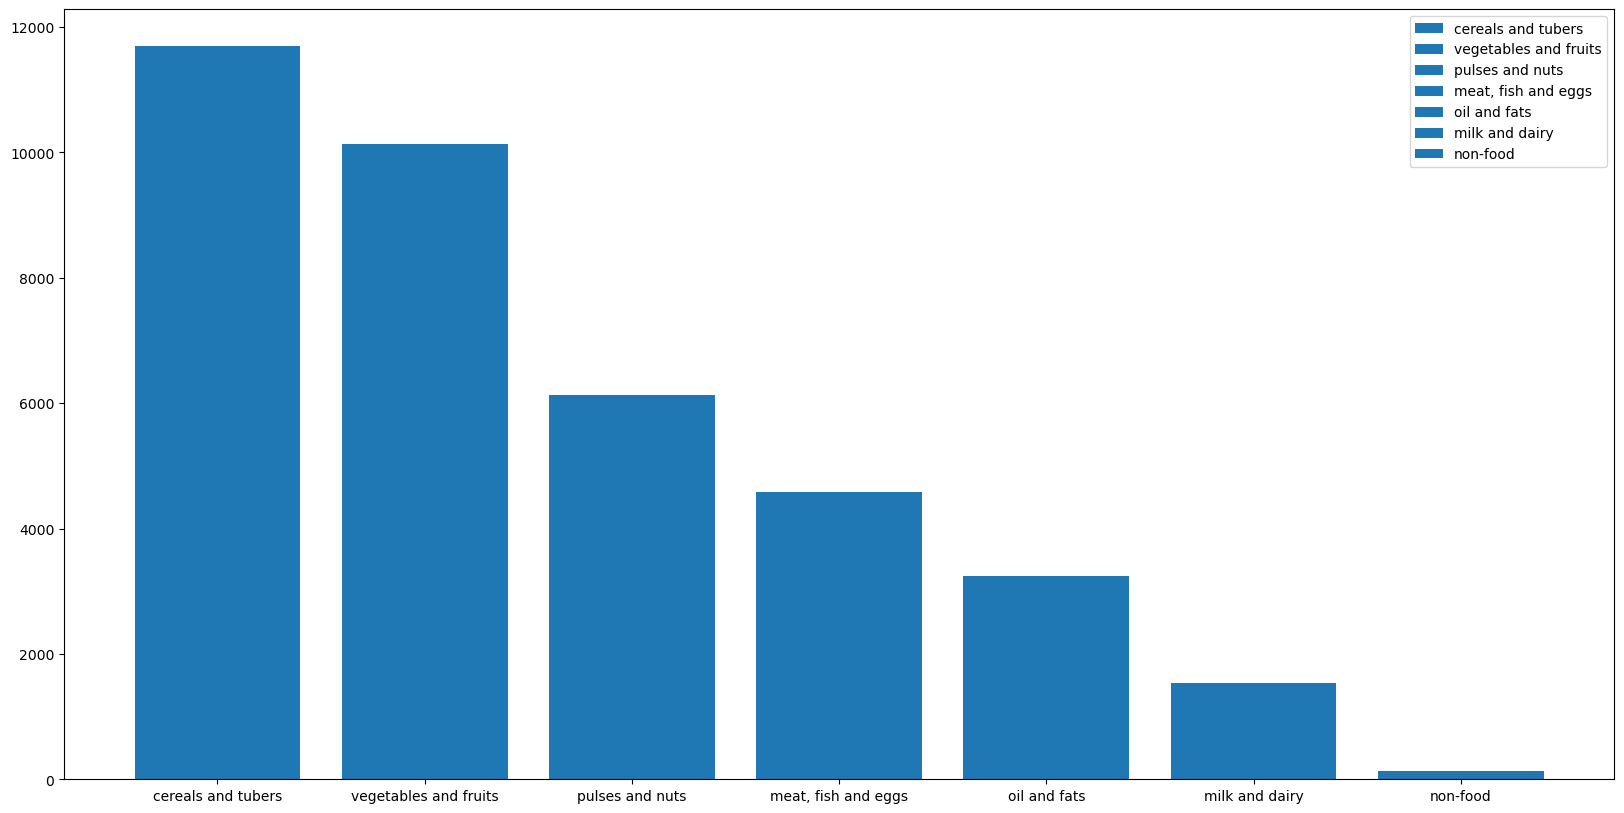

In [28]:
plot_data = dict(dataframe['commodity_category'].value_counts())
plt.figure(figsize=(20, 10))
plt.bar(plot_data.keys(), plot_data.values(), label=list(plot_data.keys()))
plt.legend()
plt.show()



<Axes: ylabel='count'>

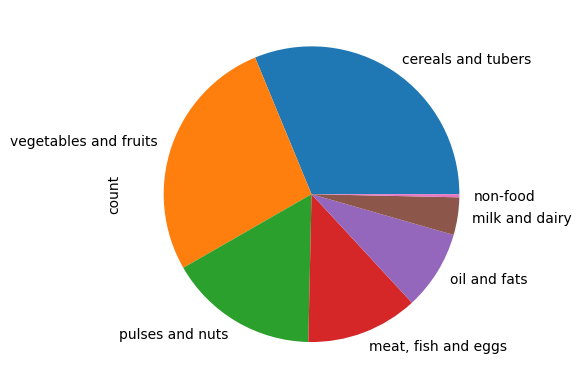

In [29]:
dataframe['commodity_category'].value_counts().plot.pie()

In [30]:
from sklearn.preprocessing import OrdinalEncoder
ord_enc = OrdinalEncoder()

dataframe['admin1_code'] = ord_enc.fit_transform(dataframe[['admin1_code']]).astype('int')
dataframe['commodity_category'] = ord_enc.fit_transform(dataframe[['commodity_category']]).astype('int')
dataframe['admin2_code'] = ord_enc.fit_transform(dataframe[['admin2_code']]).astype('int')
dataframe["unit"] = ord_enc.fit_transform(dataframe[["unit"]]).astype('int')

In [31]:
dataframe

,admin1_code,admin2_code,lat,lon,commodity_category,unit,price,reference_period_start,reference_period_end
0,0,4,26.9833333,87.3333333,0,1,17.1,2001-04-15,2001-05-14
1,0,4,26.9833333,87.3333333,0,1,19.0,2001-04-15,2001-05-14
2,0,1,26.9103,87.9375,0,1,13.5,2001-04-15,2001-05-14
3,0,1,26.9103,87.9375,0,1,16.0,2001-04-15,2001-05-14
4,0,2,26.483333,87.85,0,1,13.37,2001-04-15,2001-05-14
...,...,...,...,...,...,...,...,...,...
37447,6,29,28.693047,80.656386,6,1,80.0,2024-11-15,2024-12-14
37448,6,29,28.693047,80.656386,6,1,80.0,2024-11-15,2024-12-14
37449,6,29,28.693047,80.656386,6,1,150.0,2024-11-15,2024-12-14
37450,6,29,28.693047,80.656386,6,1,70.0,2024-11-15,2024-12-14


In [32]:
dataframe['admin1_code']=dataframe['admin1_code'].astype("int")
dataframe['admin2_code']=dataframe['admin2_code'].astype("int")
dataframe['commodity_category']=dataframe['commodity_category'].astype("int")
dataframe['price'] = dataframe['price'].fillna(0).astype(float)
dataframe['unit']=dataframe['unit'].astype("int")

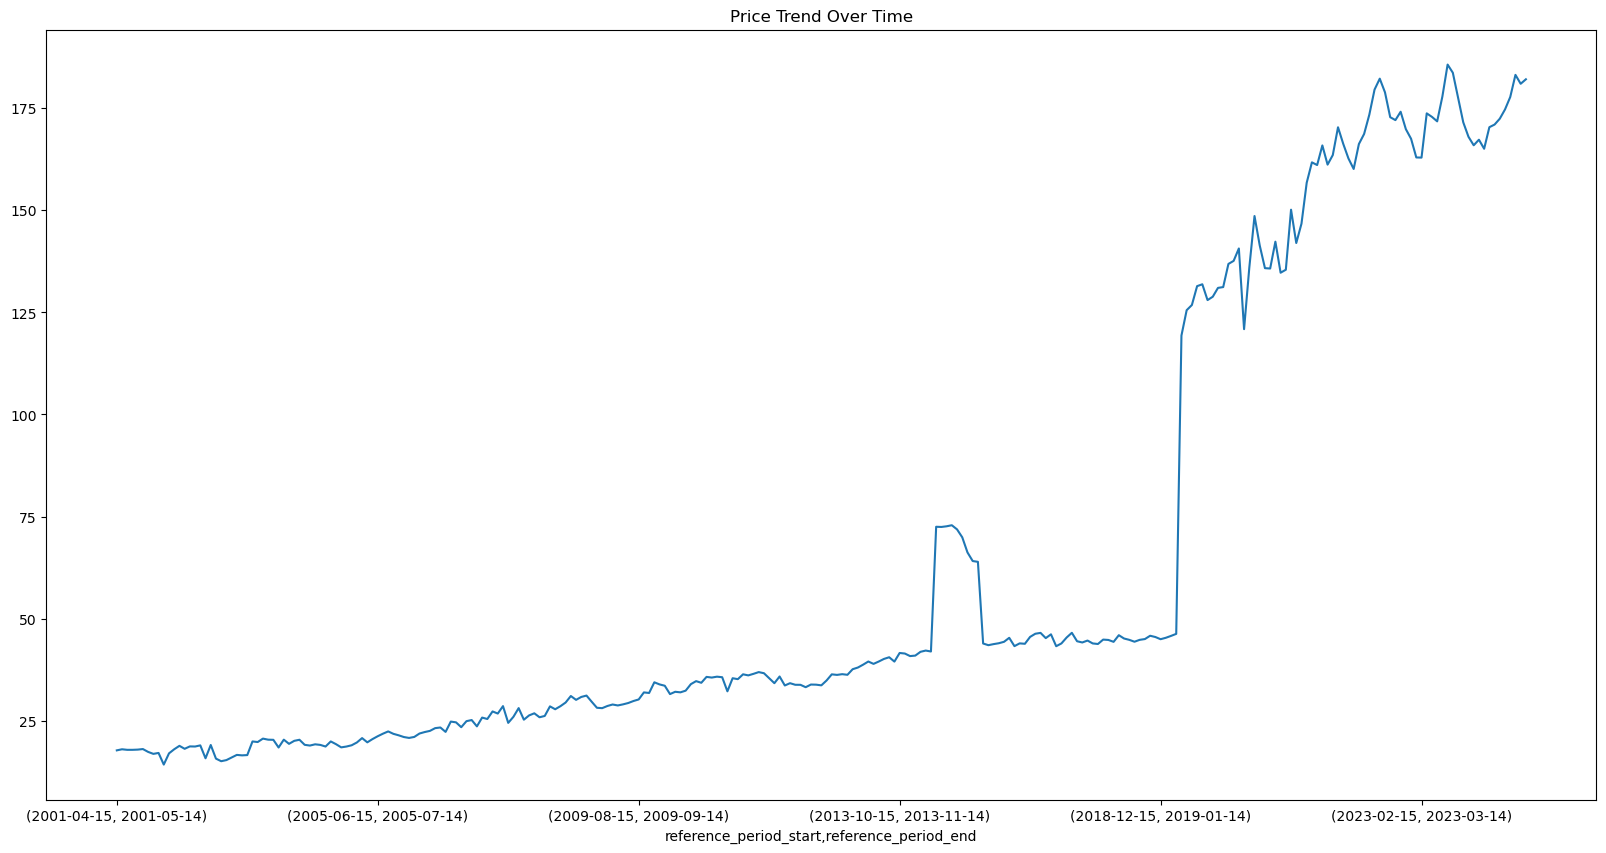

In [33]:
dataframe.groupby(["reference_period_start", "reference_period_end"])["price"].mean().plot(figsize=(20, 10))
plt.title("Price Trend Over Time")
plt.show()

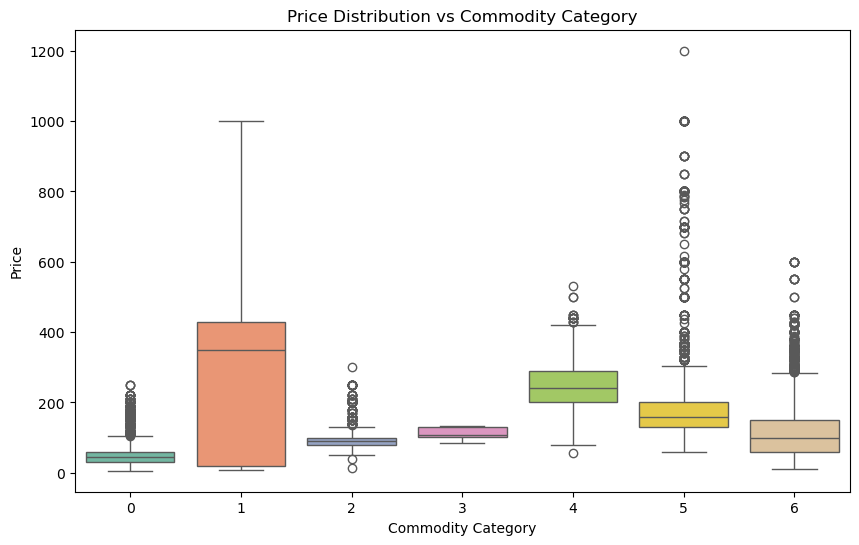

In [34]:

plt.figure(figsize=(10, 6))
sns.boxplot(x='commodity_category', y='price', data=dataframe, palette='Set2')

# Adding labels and title
plt.xlabel('Commodity Category')
plt.ylabel('Price')
plt.title('Price Distribution vs Commodity Category')

# Show the plot
plt.show()


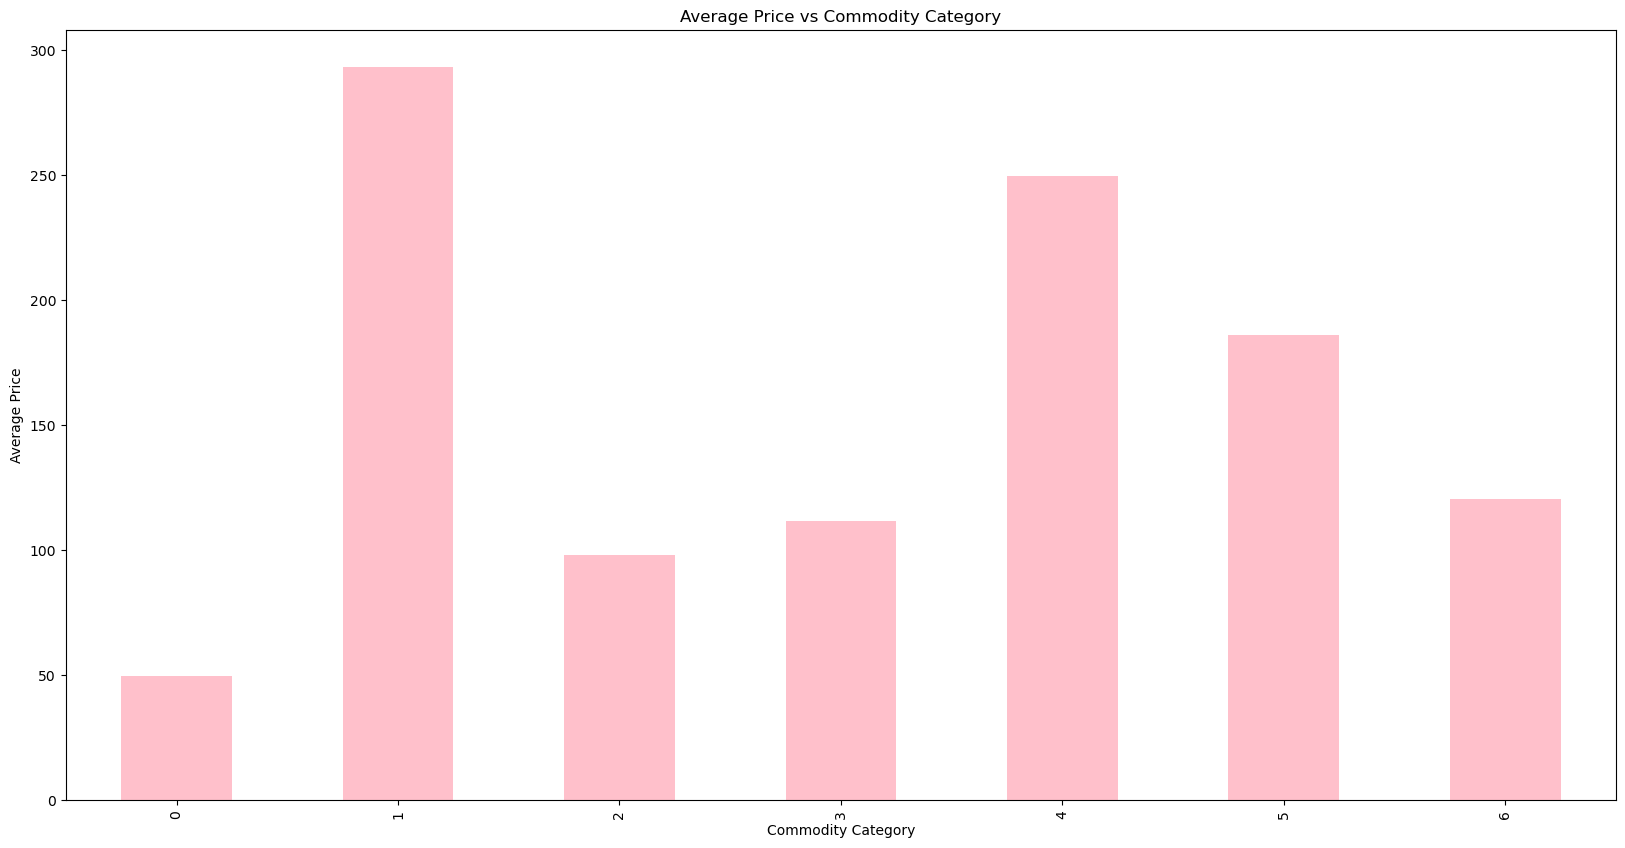

In [35]:
avg_price = dataframe.groupby('commodity_category')['price'].mean()
plt.figure(figsize=(20,10))
avg_price.plot(kind='bar', color='pink')
plt.xlabel('Commodity Category')
plt.ylabel('Average Price')
plt.title('Average Price vs Commodity Category')

# Show the plot
plt.show()


In [38]:
auto=dataframe[['admin1_code','admin2_code','lat','lon','commodity_category','unit'	,'price']]
auto

,admin1_code,admin2_code,lat,lon,commodity_category,unit,price
0,0,4,26.9833333,87.3333333,0,1,17.10
1,0,4,26.9833333,87.3333333,0,1,19.00
2,0,1,26.9103,87.9375,0,1,13.50
3,0,1,26.9103,87.9375,0,1,16.00
4,0,2,26.483333,87.85,0,1,13.37
...,...,...,...,...,...,...,...
37447,6,29,28.693047,80.656386,6,1,80.00
37448,6,29,28.693047,80.656386,6,1,80.00
37449,6,29,28.693047,80.656386,6,1,150.00
37450,6,29,28.693047,80.656386,6,1,70.00


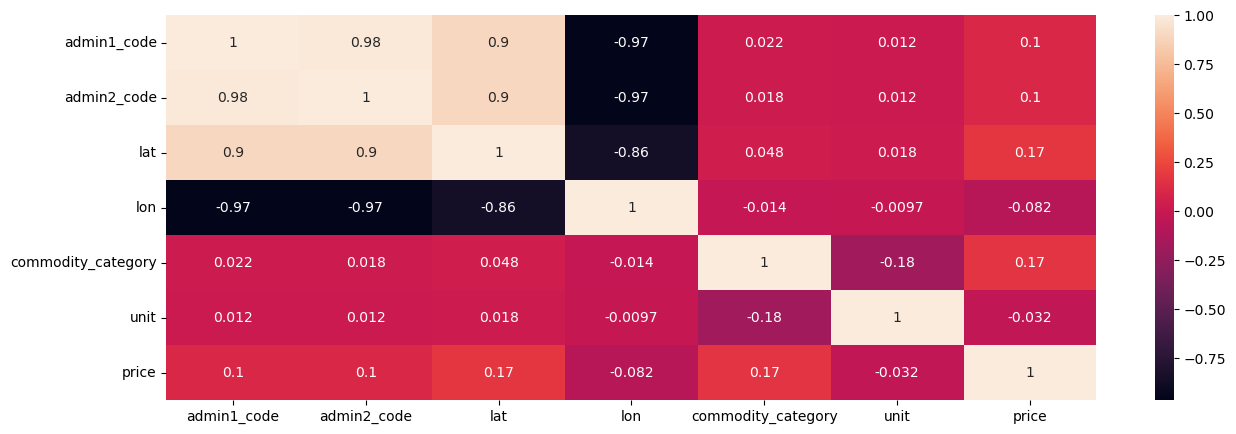

In [39]:
import seaborn as sns
plt.figure(figsize=(15,5))
sns.heatmap(auto.corr(),annot=True)
plt.show()

In [40]:
from sklearn.model_selection import train_test_split
# We specify this so that the train and test data set always have the same rows, respectively
df_train, df_test = train_test_split(auto, train_size = 0.85, test_size = 0.15, random_state = 1)

In [48]:
from sklearn.linear_model import LinearRegression
X_train = df_train[['admin1_code','admin2_code','lat','lon','commodity_category','unit'	]]
y_train['price'] = pd.to_numeric(df['price'], downcast='integer', errors='coerce')

from sklearn.linear_model import LogisticRegression
lr = LinearRegression()
lr_model = lr.fit(X_train, y_train)

In [51]:
import pickle as pk
filename = r'C:\Users\Asus\Desktop\broad-way\foodPrice.pickle'
pk.dump(lr_model, open(filename, 'wb'))


In [53]:
data = auto.iloc[109:110]
data

,admin1_code,admin2_code,lat,lon,commodity_category,unit,price
109,0,4,26.9833333,87.3333333,0,1,15.7


In [54]:
actual_price = data['price']
data = data.drop(['price'],axis = 1)
data

,admin1_code,admin2_code,lat,lon,commodity_category,unit
109,0,4,26.9833333,87.3333333,0,1


Predicted Price [[113.56374001]]
Actual Price 109    15.7
Name: price, dtype: float64


Linear regression =  8
